# Analysis of Mutual Information Results

## Setup

In [1]:
from pathlib import Path
import os
wd=Path().absolute().parent
os.chdir(wd) #change the working dirctory to the root

import matplotlib.pyplot as plt
from modules.func import *
import pickle

In [2]:
all_data_dir=Path('data/alldata/') # data directory
datalist=[x for x in all_data_dir.iterdir()] # get the list of files under the data directory
output_dir=Path("output/data/info_metrics/") # setup the output directory

## Neuorns's MI (histogram)
**in terms of different number of partitions**

### Vertical
#### Side Notes
When `n_parts`<4, MI = 0; this is probably because the neurons spike everywhere and hard to distinguish.

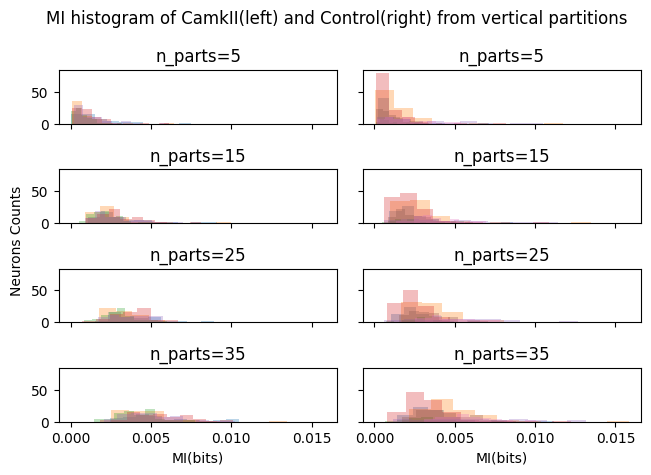

In [22]:
partition_type="vertical"

info_camkII_all_list=[]
info_control_all_list=[]

n_parts_range=np.arange(2,40)[[3,13,23,33]]#[2:6]
fig,axes=plt.subplots(nrows=len(n_parts_range),ncols=2,sharey=True,sharex=True)
for id_,n_parts in enumerate(n_parts_range):
    for data_dir in np.array(datalist):
        data_name=str(data_dir).split('/')[-1]
        with open(output_dir/f"info_MI_nNeurons_nParts_{partition_type}_{data_name}", "rb") as f:
            I_nParts_list,_,n_neurons_range=pickle.load(f)
        I_Neurons_list=I_nParts_list[n_parts-2] 
        I_list=I_Neurons_list

        if "CaMKII" in data_name:
            info_camkII_all_list.append(I_list)
            axes[id_][0].hist(I_list,alpha=.3)
            axes[id_][0].set_title(f"n_parts={n_parts}")
        else:
            info_control_all_list.append(I_list)
            axes[id_][1].hist(I_list,alpha=.3)
            axes[id_][1].set_title(f"n_parts={n_parts}")

axes[3][0].set_xlabel("MI(bits)")
axes[3][1].set_xlabel("MI(bits)")

fig.text(-.01, 0.5, "Neurons Counts", va='center', rotation='vertical')
plt.suptitle(f"MI histogram of CamkII(left) and Control(right) from {partition_type} partitions")
plt.tight_layout()

### Horizontal

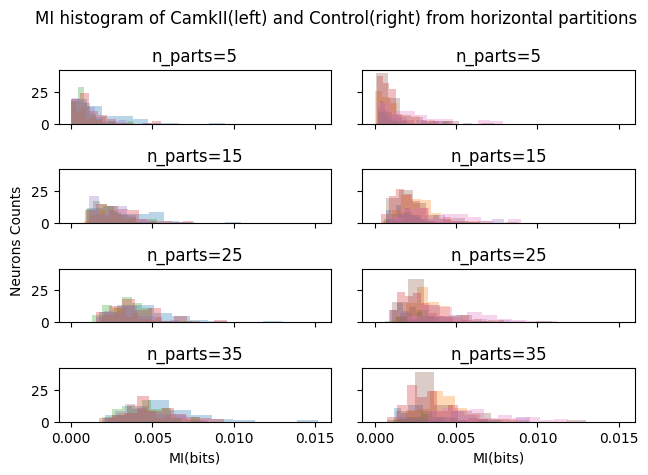

In [23]:
partition_type="horizontal"

info_camkII_all_list=[]
info_control_all_list=[]

n_parts_range=np.arange(2,40)[[3,13,23,33]]#[2:6]
fig,axes=plt.subplots(nrows=len(n_parts_range),ncols=2,sharey=True,sharex=True)
for id_,n_parts in enumerate(n_parts_range):
    for data_dir in np.array(datalist):
        data_name=str(data_dir).split('/')[-1]
        with open(output_dir/f"info_MI_nNeurons_nParts_{partition_type}_{data_name}", "rb") as f:
            I_nParts_list,_,n_neurons_range=pickle.load(f)
        I_Neurons_list=I_nParts_list[n_parts-2] 
        I_list=I_Neurons_list

        if "CaMKII" in data_name:
            info_camkII_all_list.append(I_list)
            axes[id_][0].hist(I_list,alpha=.3)
            axes[id_][0].set_title(f"n_parts={n_parts}")
        else:
            info_control_all_list.append(I_list)
            axes[id_][1].hist(I_list,alpha=.3)
            axes[id_][1].set_title(f"n_parts={n_parts}")

axes[3][0].set_xlabel("MI(bits)")
axes[3][1].set_xlabel("MI(bits)")

fig.text(-.01, 0.5, "Neurons Counts", va='center', rotation='vertical')
plt.suptitle(f"MI histogram of CamkII(left) and Control(right) from {partition_type} partitions")
plt.tight_layout()